## Q1 K-Means

Implement K-Means Clustering on the dataset at the following location :  https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

You are expected to do all necessary EDA, feature scaling and transforms.

First, arbitarily choose cluster value as 2. Then use the elbow method which was discussed in class to identify the best number of cluster. While exploring this, if you observe the need to consider inertia as a factor, do so with proper rationale.

Write a bried explanation as to how PCA can help with clustering in this example.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [ ]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [ ]:
df.status_type.value_counts(normalize=True)

photo     0.608227
video     0.331064
status    0.051773
link      0.008936
Name: status_type, dtype: float64

In [ ]:
df['status_published']=pd.to_datetime(df['status_published'])

In [ ]:
#Social media trends can change every year, we'll use that information here
df['status_published'].dt.year.value_counts(normalize=True)

2018    0.361702
2017    0.319574
2012    0.083546
2016    0.083404
2013    0.070922
2015    0.047801
2014    0.033050
Name: status_published, dtype: float64

In [ ]:
df['year'] = df['status_published'].dt.year

In [ ]:
#K-means is highly sensitive to outliers so let's see how many outliers we have
df.describe(percentiles=[0.5,0.75,0.8,0.9,0.95])

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,2016.382128
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,1.943176
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,2018.000000
80%,5640.200000,267.000000,51.000000,10.000000,233.000000,6.000000,1.000000,0.000000,0.000000,0.000000,2018.000000
90%,6345.100000,520.500000,508.100000,136.000000,496.100000,40.100000,2.000000,2.000000,0.000000,0.000000,2018.000000
95%,6697.550000,1239.650000,1210.650000,260.100000,1160.100000,77.000000,4.000000,4.000000,1.000000,1.000000,2018.000000
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,2018.000000


There seem to be some outliers. However, the outliers represent highly popular posts. There is a rationale behind these outliers so I don't think we should be treating them directly.

In [ ]:
#Creating Dummies for status type
dummies = pd.get_dummies(df.status_type, prefix='status_type')
df = pd.concat([df, dummies], axis=1)
df.drop('status_type', axis=1, inplace=True)

In [ ]:
df

,status_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,status_type_link,status_type_photo,status_type_status,status_type_video
0,1,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018,0,0,0,1
1,2,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018,0,1,0,0
2,3,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018,0,0,0,1
3,4,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018,0,1,0,0
4,5,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,0,2016,0,1,0,0
7046,7047,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,0,2016,0,1,0,0
7047,7048,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,0,2016,0,1,0,0
7048,7049,2016-09-20 00:43:00,351,12,22,349,2,0,0,0,0,2016,0,1,0,0


In [ ]:
#We don't need these columns
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [ ]:
#Let's see the singular values
u, s, v = np.linalg.svd(df)

In [ ]:
np.set_printoptions(suppress=True)
np.round(s, 2)

array([172963.17,  74848.09,  52675.27,   8764.19,   2380.99,    682.7 ,
          311.43,    141.72,     60.32,     49.75,     22.47,      9.04,
            2.63,      0.04])

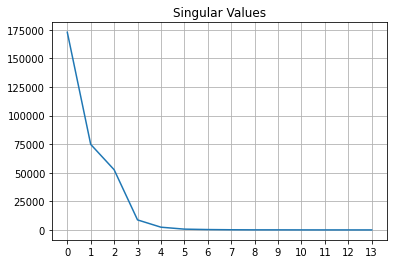

In [ ]:
plt.plot(s)
plt.xticks(ticks=list(range(s.shape[0])))
plt.title('Singular Values')
plt.grid()

We can actually see that we can compress our data into three columns without losing out on much information. However, if we did that then we'll be compromising on explainability. PCA also helps in noise reduction. Let's explore both scenarios.

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

I'm using RobustScaler due to presence of outliers. Sources on the internet are using MinMaxScaler and that does give low inertia because it shrinks the distances between data points, however MinMax is sensitive to outliers. RobustScaler will give us more explainable results

In [ ]:
col = ['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']

In [ ]:
df[col] = pd.DataFrame(scaler.fit_transform(df[col]), columns = col)

In [ ]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,status_type_link,status_type_photo,status_type_status,status_type_video
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,0.844639,9.580697,10.005638,0.936174,4.242884,1.289362,0.696454,0.243688,0.113191,2016.382128,0.008936,0.608227,0.051773,0.331064
std,2.290224,38.679862,32.899991,2.679418,13.324310,8.719650,3.957183,1.597156,0.726812,1.943176,0.094115,0.488181,0.221584,0.470629
min,-0.294554,-0.173913,0.000000,-0.345753,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.210396,-0.173913,0.000000,-0.244411,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,0.000000,1.000000,0.000000,0.000000
75%,0.789604,0.826087,1.000000,0.755589,1.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,0.000000,1.000000,0.000000,1.000000
max,23.022277,912.434783,856.000000,27.731744,219.000000,278.000000,157.000000,51.000000,31.000000,2018.000000,1.000000,1.000000,1.000000,1.000000


Now we see our entire data has been scaled at similar levels and values above 1 are outliers. Let's implement Kmeans with 2 clusters.

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(2)
model.fit(df)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
model.inertia_

9589016.078619678

In [ ]:
#Cluster Centers
pd.DataFrame(model.cluster_centers_, columns = df.columns)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.741770,3.477061,4.728193,0.851905,2.387035,0.663403,0.367750,0.165554,0.069723,2016.329625,9.345794e-03,0.635811,5.414627e-02,0.300697
1,3.088797,142.734769,125.135922,2.774529,44.729234,14.944984,7.867314,1.948220,1.061489,2017.527508,1.387779e-17,0.006472,-2.151057e-16,0.993528


KMeans has clustered these posts into either less popular ones or more popular ones. Let's see how many clusters is optimal using elbow method.

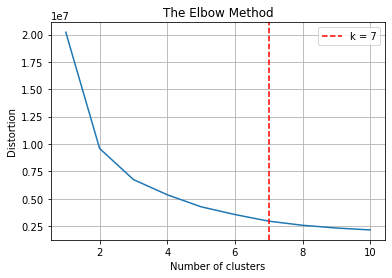

In [ ]:
#Using the code snippet from the notebook

max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(df) >= i:
    #    print(i)
       model = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=42)
       model.fit(df)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [ ]:
#Let's model for 7 clusters
model = KMeans(7)
model.fit(df)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [ ]:
#Our Inertia has reduced
model.inertia_

2944055.6711271224

In [ ]:
#Cluster Centers
clusters = pd.DataFrame(model.cluster_centers_, columns = df.columns)
clusters

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.721714,0.897905,0.932120,0.858930,0.731453,0.607716,0.214946,0.140055,0.041336,2016.209110,1.021235e-02,6.934673e-01,5.916680e-02,0.237154
1,3.367265,340.455163,181.546875,3.073584,48.718750,6.843750,8.625000,3.062500,1.406250,2017.562500,-3.469447e-18,3.125000e-02,-1.387779e-17,0.968750
2,0.990058,33.463553,47.694307,0.805595,20.687019,1.292079,2.153465,0.455446,0.384488,2017.630363,1.734723e-17,1.320132e-02,-3.191891e-16,0.986799
3,1.456064,177.926630,75.559896,1.297504,21.805556,2.833333,6.708333,2.416667,0.593750,2017.250000,8.673617e-18,-5.551115e-16,7.632783e-17,1.000000
4,2.550330,831.811594,102.333333,2.338798,36.777778,3.666667,6.666667,3.000000,0.666667,2016.333333,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
5,7.269802,123.782609,485.791667,6.116244,118.111111,74.500000,11.000000,2.666667,1.500000,2018.000000,0.000000e+00,1.110223e-16,0.000000e+00,1.000000
6,4.374444,76.175173,142.041667,3.959913,60.814010,26.152174,9.224638,1.615942,1.427536,2017.688406,1.387779e-17,7.246377e-03,1.318390e-16,0.992754


Let's make this a bit more explainable

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_3d(clusters, x='num_reactions', y='num_comments', z='num_shares')
fig.show()

I only picked comments, reactions and shares for explainability. These seem to vary more in cluster centers than other features. This is interesting as it helps to visualize how posts are clustered - some are low on everything, then there are some that are balanced, then some are high on either reactions, shares or comments.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [ ]:
#Let's see the results after using PCA
pipeline = Pipeline(steps = [
    ('PCA', PCA(3)),
     ('model', KMeans(n_clusters=7))
])

In [ ]:
pipeline.fit(df)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('PCA', PCA(n_components=3)), ('model', KMeans(n_clusters=7))])

In [ ]:
#This has resulted in lower inertia. This means dataset has been clustered well.
pipeline['model'].inertia_

2495264.66369611

In [ ]:
clusters = pipeline['model'].cluster_centers_ 

In [ ]:
fig = px.scatter_3d(clusters, x=0, y=1, z=2)
fig.show()

The 3D scatterplot looks similar to the one we constructed above. However, it's not as explainable as the previous one because features have been transformed. Interestingly though, we see similar graph because the cluster centers were varied primarily across 3 dimensions.

Intuitively, PCA eliminates low variance dimensions and only keeps high variance dimensions. This helps to make clustering more efficient as noise has been eliminated from the data. 

In a recent paper, It was found that PCA is able to compress the Euclidean distance of intra-cluster pairs while preserving Euclidean distance of inter-cluster pairs. Therefore, compressibility of PCA helps a lot.

Ref - https://arxiv.org/abs/2204.10888

## Q2 Loss Functions

Let the desired output to 10 inputs be,

> [0,1,0,0,1,0,0,1,1,1]


and let the corresponding actual output obtained from a machine be 


> [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


Find programmatically or by hand the loss obtained from using:

1.   a symmetric 0 − 1 loss function,

2.   the cross-entropy loss function and

3.   the hinge loss function.

If required assume a threshold of 0.5 to obtain a class from the machine output.  (sklearn by default uses 0.5 as threshold for binary classification) 

In [ ]:
y = np.array([0,1,0,0,1,0,0,1,1,1])
yhat = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

## Symmetric 0-1 Loss Function

In [ ]:
thresh = lambda x: 1 if x>0.5 else 0
y_pred = np.array([thresh(i) for i in yhat])

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
Loss = np.where(y_pred != y)[0].shape[0] / y_pred.shape[0]

In [ ]:
print("Symmetric Loss: ", Loss)

Symmetric Loss:  0.5


## Cross Entropy Loss Function

In [ ]:
Loss = np.mean(-(y * np.log(yhat) + (1 - y) * np.log(1 - yhat)))

In [ ]:
print("Cross Entropy Loss: ", Loss)

Cross Entropy Loss:  0.9162907318741551


## Hinge Loss Function

For implementing Hinge Loss, our labels need to be +1 and -1. That requires scaling.

In [ ]:
y = y*2 - 1
yhat = yhat * 2 -1

In [ ]:
y

array([-1,  1, -1, -1,  1, -1, -1,  1,  1,  1])

In [ ]:
yhat

array([-0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6])

In [ ]:
Loss = np.mean(np.maximum(0, 1-yhat * y))

In [ ]:
print("Hinge Loss: ", Loss)

Hinge Loss:  1.0
